In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1

In [59]:
min_temp = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
max_temp = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
month = np.arange(1,13)

In [32]:
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [73]:
# plynomial function for minimum temperature
pol = PolynomialFeatures(degree = 5)
X = pol.fit_transform(month.reshape(-1,1))
y = min_temp
lm_min = LinearRegression()
lm_min.fit(X, y)

LinearRegression()

In [72]:
# plynomial function for maximum temperature
pol_max = PolynomialFeatures(degree = 4)
X = pol_max.fit_transform(month.reshape(-1,1))
y = max_temp
lm_max = LinearRegression()
lm_max.fit(X, y)

LinearRegression()

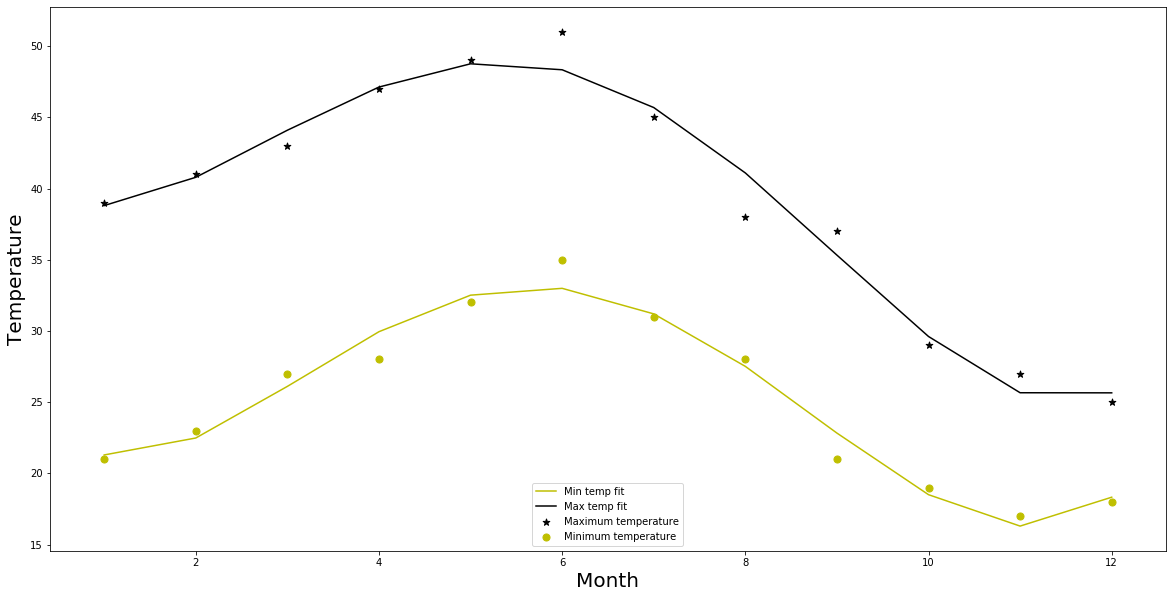

In [76]:
plt.figure(figsize = (20,10))
plt.scatter(month,max_temp, c ='k',s = 50, marker = '*' ,label = 'Maximum temperature')
plt.scatter(month,min_temp, c ='y',s = 50, marker = 'o' ,label = 'Minimum temperature')
plt.plot(month , lm_min.predict(pol.transform(month.reshape(-1,1))) ,c = 'y' ,label = 'Min temp fit')
plt.plot(month , lm_max.predict(pol_max.transform(month.reshape(-1,1))) ,c = 'k' ,label = 'Max temp fit')
plt.legend(loc = 'lower center')
plt.xlabel('Month',fontsize = 20)
plt.ylabel('Temperature',fontsize = 20)
plt.show()

# 2

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [97]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


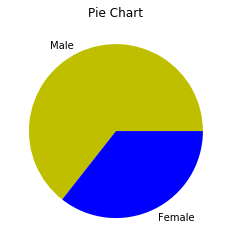

In [98]:
plt.pie(data.sex.value_counts(), labels = ['Male', 'Female'] , colors= ['y', 'b'])
plt.title('Pie Chart')
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


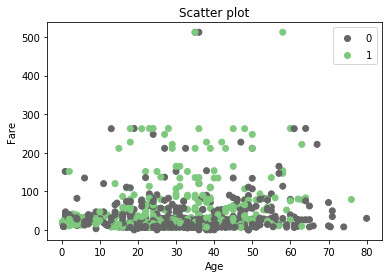

In [123]:
temp = data[['age', 'fare', 'sex']]
temp.dropna(inplace = True)
plot = plt.scatter(temp.age , temp.fare, c = temp.sex.map({'male':0, 'female':1}) , cmap = plt.colormaps()[1])
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(*plot.legend_elements())